In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats
from collections import Counter
from scipy.stats import mannwhitneyu

# Objective
This notebook plots the violin plots for the max instantaneous ERM in both an aggregate and seasonal (somewhat subjective sense) for the updated and final ARs

In [2]:
#bring in the data we need
non_mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_Non_MJO_ARs.csv')
non_mjo_og = non_mjo_og.drop(columns=['Unnamed: 0'])

mjo_act_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Active_ARs.csv')
mjo_act_og = mjo_act_og.drop(columns=['Unnamed: 0'])
mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Connected_ARs.csv')
mjo_og = mjo_og.drop(columns=['Unnamed: 0'])

## Overall

In [4]:
non_mjo_erm = np.array(non_mjo_og['Max IVT'])
mjo_act_erm = np.array(mjo_act_og['Max IVT'])
mjo_erm = np.array(mjo_og['Max IVT'])

In [5]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

1390.0374911217948
3641.1313
129.34178
1370.3357


In [6]:
print(mjo_act_erm.mean())
print(mjo_act_erm.max())
print(mjo_act_erm.min())
print(np.median(mjo_act_erm))

1397.6536022068965
4497.6104
94.35453
1394.578


In [7]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

1604.1818043968872
3665.7583
227.59364
1556.4285


In [8]:
print(len(non_mjo_erm))
print(len(mjo_act_erm))
print(len(mjo_erm))

312
580
257


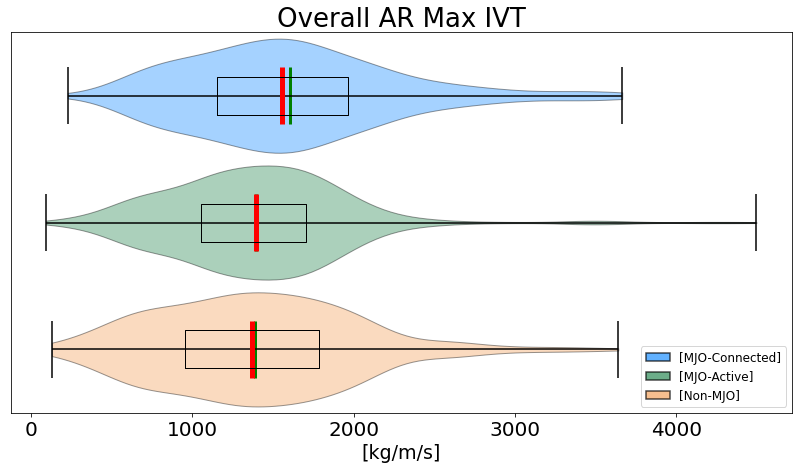

In [9]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_act_erm,mjo_erm]
type_labels = ['[Non-MJO]', '[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('Overall AR Max IVT', fontsize=titlesize)
ax.set_xlabel('[kg/m/s]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/IVT/Overall_IVT.png", dpi=350, bbox_inches='tight')
plt.show()

In [10]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)
stat, p_value = shapiro(mjo_act_erm)
print(p_value)
stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

0.00018090887169819325
4.416243704433322e-16
1.444780309611815e-06


In [11]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='less')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='less')
print(p_value)
# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)

#MJO-Connected case is statistically higher than the other two!

0.8646550253293681
2.5570238464224198e-05
0.0002177451599053117
0.43232751266468405
1.2785119232112099e-05
0.00010887257995265586


## DJFM

In [22]:
#mjo not active

dec=non_mjo_og[non_mjo_og['Month'] == 12]
jan=non_mjo_og[non_mjo_og['Month'] == 1]
feb=non_mjo_og[non_mjo_og['Month'] == 2]
mar=non_mjo_og[non_mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

non_mjo_erm = np.array(CA_non_DJF['Max IVT'])

In [23]:
#mjo active

dec=mjo_act_og[mjo_act_og['Month'] == 12]
jan=mjo_act_og[mjo_act_og['Month'] == 1]
feb=mjo_act_og[mjo_act_og['Month'] == 2]
mar=mjo_act_og[mjo_act_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_act_erm = np.array(CA_non_DJF['Max IVT'])

In [24]:
#mjo connected
dec=mjo_og[mjo_og['Month'] == 12]
jan=mjo_og[mjo_og['Month'] == 1]
feb=mjo_og[mjo_og['Month'] == 2]
mar=mjo_og[mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_erm = np.array(CA_non_DJF['Max IVT'])

In [25]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

1268.5585595238092
2300.842
568.29333
1223.82715


In [26]:
print(mjo_act_erm.mean())
print(mjo_act_erm.max())
print(mjo_act_erm.min())
print(np.median(mjo_act_erm))

1326.4828226666666
4497.6104
94.35453
1347.6575


In [27]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

1479.8790146666668
2936.0283
643.9154
1523.8315


In [28]:
print(len(non_mjo_erm))
print(len(mjo_act_erm))
print(len(mjo_erm))

42
315
105


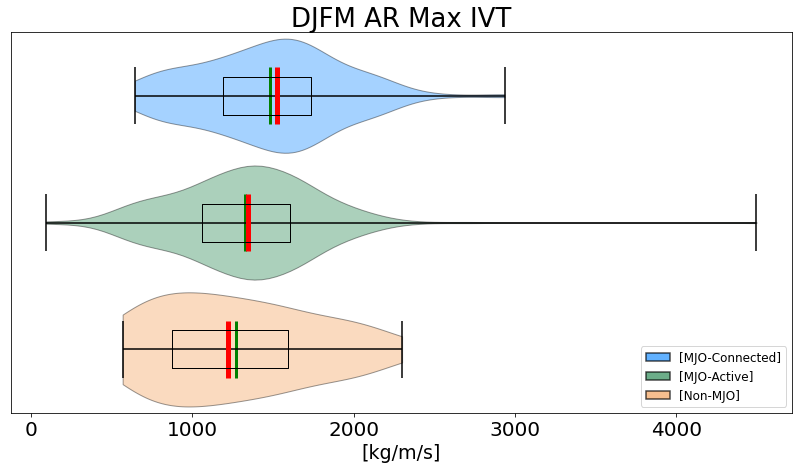

In [29]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_act_erm,mjo_erm]
type_labels = ['[Non-MJO]', '[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('DJFM AR Max IVT', fontsize=titlesize)
ax.set_xlabel('[kg/m/s]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/IVT/DJFM_IVT.png", dpi=350, bbox_inches='tight')
plt.show()

In [30]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)
stat, p_value = shapiro(mjo_act_erm)
print(p_value)
stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

0.07445285469293594
6.032136457001513e-10
0.11905735731124878


In [31]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='less')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='less')
print(p_value)
# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)

# the MJO-Active and Non-MJO cases are statistically different, but the MJO-Connected case is higher than both!

0.32331528205948834
0.0015725887428097434
0.012201812444977107
0.16165764102974417
0.0007862943714048717
0.006100906222488553


## Overall Seasons


In [62]:
all_ivt = pd.concat([non_mjo_og,mjo_act_og,mjo_og], ignore_index=True)

jan = all_ivt[all_ivt['Month'] == 1]
feb= all_ivt[all_ivt['Month'] == 2]
mar= all_ivt[all_ivt['Month'] == 3]
apr= all_ivt[all_ivt['Month'] == 4]
may= all_ivt[all_ivt['Month'] == 5]
jun= all_ivt[all_ivt['Month'] == 6]
jul= all_ivt[all_ivt['Month'] == 7]
aug= all_ivt[all_ivt['Month'] == 8]
sep= all_ivt[all_ivt['Month'] == 9]
oct= all_ivt[all_ivt['Month'] == 10]
nov= all_ivt[all_ivt['Month'] == 11]
dec= all_ivt[all_ivt['Month'] == 12]


winter=pd.concat([dec, jan, feb], ignore_index=True)
spring=pd.concat([mar, apr, may], ignore_index=True)
summer=pd.concat([jun, jul, aug], ignore_index=True)
fall=pd.concat([sep, oct, nov], ignore_index=True)

winter_ivt = np.array(winter['Max IVT'])
spring_ivt = np.array(spring['Max IVT'])
summer_ivt = np.array(summer['Max IVT'])
fall_ivt = np.array(fall['Max IVT'])

In [63]:
print(winter_ivt.mean())
print(winter_ivt.max())
print(winter_ivt.min())
print(np.median(winter_ivt))

1418.6200685227273
4497.6104
94.35453
1423.2702


In [64]:
print(spring_ivt.mean())
print(spring_ivt.max())
print(spring_ivt.min())
print(np.median(spring_ivt))

1185.2769130864197
2797.4775
129.34178
1175.0911


In [65]:
print(summer_ivt.mean())
print(summer_ivt.max())
print(summer_ivt.min())
print(np.median(summer_ivt))

1474.7251598237885
3644.6182
204.93289
1481.7098


In [66]:
print(fall_ivt.mean())
print(fall_ivt.max())
print(fall_ivt.min())
print(np.median(fall_ivt))

1635.7361606134968
4282.8335
263.49185
1578.3926000000001


In [67]:
print(len(winter_ivt))
print(len(spring_ivt))
print(len(summer_ivt))
print(len(fall_ivt))

352
243
227
326


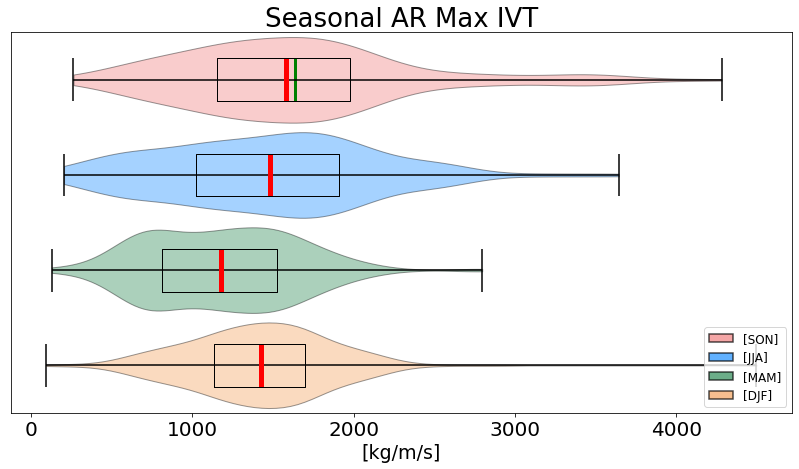

In [71]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [winter_ivt,spring_ivt,summer_ivt,fall_ivt]
type_labels = ['[DJF]', '[MAM]','[JJA]', '[SON]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue', 'lightcoral']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('Seasonal AR Max IVT', fontsize=titlesize)
ax.set_xlabel('[kg/m/s]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/IVT/Seas_IVT.png", dpi=350, bbox_inches='tight')
plt.show()

In [69]:
from scipy.stats import shapiro
# data_area = [winter_ivt,spring_ivt,summer_ivt,fall_ivt]
stat, p_value = shapiro(winter_ivt)
print(p_value)
stat, p_value = shapiro(spring_ivt)
print(p_value)
stat, p_value = shapiro(summer_ivt)
print(p_value)
stat, p_value = shapiro(fall_ivt)
print(p_value)
#none normal

6.657020712452777e-09
0.004846682772040367
0.006408192683011293
2.2007093924969467e-09


In [70]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(winter_ivt, spring_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(winter_ivt, summer_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(winter_ivt, fall_ivt, alternative='two-sided')
print(p_value)

stat, p_value = mannwhitneyu(spring_ivt, winter_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(spring_ivt, summer_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(spring_ivt, fall_ivt, alternative='two-sided')
print(p_value)

stat, p_value = mannwhitneyu(summer_ivt, winter_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(summer_ivt, spring_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(summer_ivt, fall_ivt, alternative='two-sided')
print(p_value)

stat, p_value = mannwhitneyu(fall_ivt, winter_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(fall_ivt, spring_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(fall_ivt, summer_ivt, alternative='two-sided')
print(p_value)

#winter different than spring
#winter different than fall
#summer different than spring
#spring different than fall
#summer and fall are quite close

2.077935564165546e-09
0.2632616639597437
0.0002813903104704121
2.077935564165546e-09
2.684125429837286e-07
3.414250795992221e-15
0.2632616639597437
2.684125429837286e-07
0.05013973339879402
0.0002813903104704121
3.414250795992221e-15
0.05013973339879402
